# Test consolidation of boundaries

In [1]:
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
# from descartes import PolygonPatch
# from scipy.spatial import ConvexHull
# from shapely.geometry import Polygon, MultiPoint, Point
# from shapely.ops import unary_union
from shapely import wkt
# from shapely.plotting import plot_polygon

/opt/tljh/user/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_1908297/433292656.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html

In [2]:
# add transform non-polygons to polygons
overshare = .1
uber = gpd.read_file('../plots/dbscanpats13/samples/dbpats_concave_2013_15_12.geojson')
uber = uber[uber.geom_type=='Polygon']
curgdf = gpd.read_file('../plots/dbscanpats13/samples/dbpats_concave_2013_15_14.geojson')
curgdf = curgdf[curgdf.geom_type=='Polygon'] 

uber = uber[uber.cluster.isin([15,19,22,18])] # just to test
curgdf = curgdf[curgdf.cluster.isin([18,22,24, 26])] # just to test
olduber = uber.copy(deep=True)

# test iterate and types

In [3]:
for row in uber.itertuples():
    id = row[1]
    geom = gpd.GeoSeries(row[3])
    print(geom[0]) 
    geomwkt = geom.to_wkt
    print(geomwkt)
    geomwkb = geom.to_wkb
    print(geomwkb) 

POLYGON ((-117.2243 33.2131, -117.052 33.1388, -116.867 33.0417, -116.921 32.8572, -116.962 32.7947, -117.038 32.5149, -117.1148 32.5783, -117.183 32.6859, -117.2268 32.7272, -117.271 32.8328, -117.2742 32.8473, -117.292 33.037, -117.351 33.1581, -117.379 33.1958, -117.379 33.1959, -117.3573 33.2072, -117.2243 33.2131))
<bound method GeoSeries.to_wkt of 0    POLYGON ((-117.22430 33.21310, -117.05200 33.1...
dtype: geometry>
<bound method GeoSeries.to_wkb of 0    POLYGON ((-117.22430 33.21310, -117.05200 33.1...
dtype: geometry>
POLYGON ((-112.0518 33.61842, -111.82615 33.58314, -111.768 33.4131, -111.634 33.2487, -111.634 33.2486, -111.82715 33.20686, -111.863 33.2344, -112.0669 33.316, -112.185 33.5386, -112.1199 33.5961, -112.0518 33.61842))
<bound method GeoSeries.to_wkt of 0    POLYGON ((-112.05180 33.61842, -111.82615 33.5...
dtype: geometry>
<bound method GeoSeries.to_wkb of 0    POLYGON ((-112.05180 33.61842, -111.82615 33.5...
dtype: geometry>
POLYGON ((-118.947 34.1811, -118.9

# Test unary union

In [4]:
s1 = 'POLYGON ((-117.2243 33.2131, -117.052 33.1388, -116.867 33.0417, -116.921 32.8572, -116.962 32.7947, -117.038 32.5149, -117.1148 32.5783, -117.183 32.6859, -117.2268 32.7272, -117.271 32.8328, -117.2742 32.8473, -117.292 33.037, -117.351 33.1581, -117.379 33.1958, -117.379 33.1959, -117.3573 33.2072, -117.2243 33.2131))'
g1 = gpd.GeoSeries(wkt.loads(s1))

In [5]:
s2 = 'POLYGON ((-117.2243 33.2131, -117.052 33.1388, -116.7 33.0517, -116.921 32.8572, -116.962 32.7947, -117.038 32.5149, -117.1148 32.5783, -117.183 32.6859, -117.2268 32.7272, -117.271 32.8328, -117.2742 32.8473, -117.292 33.037, -117.351 33.1581, -117.179 33.0958, -117.379 33.1959, -117.3573 33.2072, -117.2243 33.2131))'
g2 = gpd.GeoSeries(wkt.loads(s2))

In [6]:
u = g1
u = u.append(g2)
u= gpd.GeoSeries(u.unary_union)
u

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geoseries.py:622: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = getattr(super(), mtd)(*args, **kwargs)


0    POLYGON ((-117.05200 33.13880, -116.70000 33.0...
dtype: geometry

<AxesSubplot: >

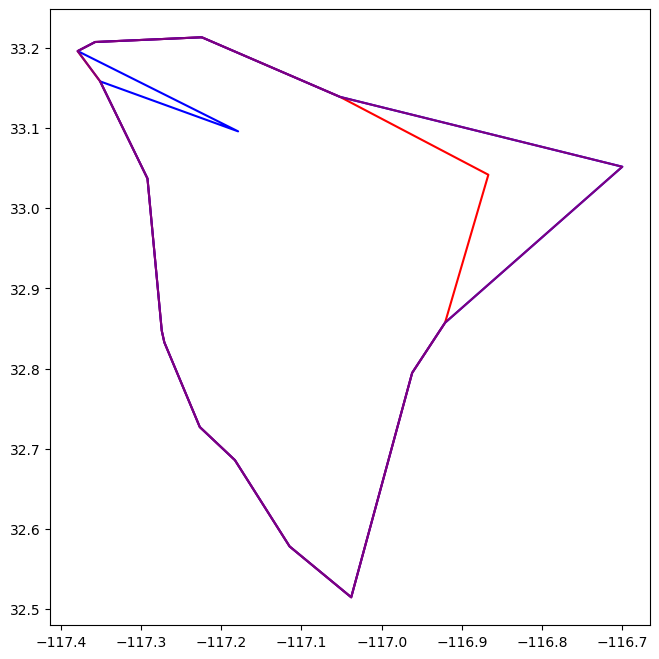

In [7]:
# g1.explore()
fig, ax = plt.subplots(figsize = (10,8)) 
g1.geometry.boundary.plot(ax=ax, color='red')
g2.geometry.boundary.plot(ax=ax, color='blue')
u.geometry.boundary.plot(ax=ax, color='purple')

# intersect test

In [30]:
s1 = 'POLYGON ((-117.2243 33.2131, -117.052 33.1388, -116.867 33.0417, -116.921 32.8572, -116.962 32.7947, -117.038 32.5149, -117.1148 32.5783, -117.183 32.6859, -117.2268 32.7272, -117.271 32.8328, -117.2742 32.8473, -117.292 33.037, -117.351 33.1581, -117.379 33.1958, -117.379 33.1959, -117.3573 33.2072, -117.2243 33.2131))'
g1 = gpd.GeoSeries(wkt.loads(s1))
s2 = 'POLYGON ((-117.2243 33.2131, -117.052 33.1388, -116.7 33.0517, -116.921 32.8572, -116.962 32.7947, -117.038 32.5149, -117.1148 32.5783, -117.183 32.6859, -117.2268 32.7272, -117.271 32.8328, -117.2742 32.8473, -117.292 33.037, -117.351 33.1581, -117.179 33.0958, -117.379 33.1959, -117.3573 33.2072, -117.2243 33.2131))'
g2 = gpd.GeoSeries(wkt.loads(s2))
g1.crs = uber.crs
g2.crs = uber.crs

## intersection

In [50]:
## does not allow to compare the area
for row in uber.itertuples():
    curg = gpd.GeoSeries(row[3])
    curg.crs = uber.crs
    i = g2.intersects(curg)
    print(i)

0    True
dtype: bool
0    False
dtype: bool
0    False
dtype: bool
0    False
dtype: bool


## Overlay

In [57]:
# finds intersection 
curg2 = gpd.GeoDataFrame(g2)
curg2.geometry = g2
i = gpd.overlay(curg2, uber, how='intersection')
oversh = i.to_crs("EPSG:32634").area[0]/g2.to_crs("EPSG:32634").area[0]
# add here check for overlap share
i

,0,cluster,polygon,geometry
0,"POLYGON ((-117.22430 33.21310, -117.05200 33.1...",15,True,"POLYGON ((-117.05200 33.13880, -116.86700 33.0..."


In [62]:
curclus = i['cluster'][0]
curgeom = uber[uber.cluster==curclus].geometry

In [81]:
# Generates union shape
u = g2
u = pd.concat([curgeom, g2.geometry])
# u = u.append(curgeom)
u= gpd.GeoSeries(u.unary_union)
u

0    POLYGON ((-117.05200 33.13880, -116.70000 33.0...
dtype: geometry

In [86]:
uber.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4 entries, 15 to 22
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   cluster   4 non-null      int64   
 1   polygon   4 non-null      bool    
 2   geometry  4 non-null      geometry
dtypes: bool(1), geometry(1), int64(1)
memory usage: 272.0 bytes


In [105]:
# curclus
# uber
uber.loc[uber['cluster']==curclus, ['geometry']]=u[0]

In [106]:
uber

,cluster,polygon,geometry
15,15,True,"POLYGON ((-117.05200 33.13880, -116.70000 33.0..."
18,18,True,"POLYGON ((-112.05180 33.61842, -111.82615 33.5..."
19,19,True,"POLYGON ((-118.94700 34.18110, -118.98660 34.2..."
22,22,True,"POLYGON ((-118.54200 34.39170, -118.59852 34.3..."


In [107]:
m = g2.explore(height=600, width=1000, color='blue', style_kwds=dict(fill =False))
uber.explore(m=m, color='red', style_kwds=dict(fill =False))
# u.explore(m=m, color='purple', style_kwds=dict(fill =False))

<AxesSubplot: >

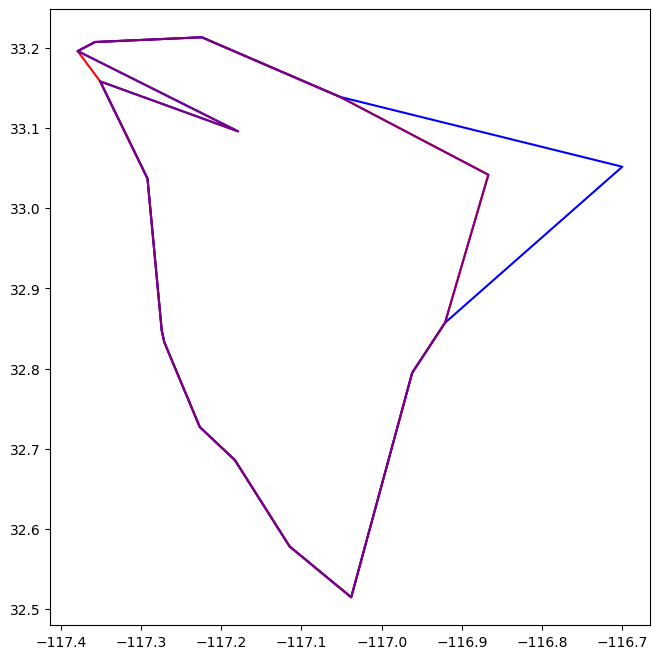

In [15]:
fig, ax = plt.subplots(figsize = (10,8)) 
g1.geometry.boundary.plot(ax=ax, color='red')
g2.geometry.boundary.plot(ax=ax, color='blue')
i.geometry.boundary.plot(ax=ax, color='purple')

# Iterate and merge union

In [252]:
# definitions
g1 = gpd.read_file('../plots/dbscanpats13/samples/dbpats_concave_2013_15_12.geojson')
g1 = g1[g1.geom_type=='Polygon']

g2 = gpd.read_file('../plots/dbscanpats13/samples/dbpats_concave_2013_15_14.geojson')
g2 = g2[g2.geom_type=='Polygon'] 

# g1 = g1[g1.cluster.isin([15,19,22,18])] # just to test
# g2 = g2[g2.cluster.isin([18,22,24, 26])] # just to test

g1.geometry=g1['geometry']
g2.geometry=g2['geometry']


In [448]:
def consolidate(gdf1, gdf2, id1='cluster', id2='cluster',
                geom1='geometry', geom2='geometry',overlap=.1, crs="epsg:4326"):
    import pandas as pd
    import geopandas as gpd
    from shapely import wkt
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning) 
    
    geometry = gpd.GeoSeries(gdf1[geom1])
    newgdf = gpd.GeoDataFrame(gdf1[[id1, geom1]], geometry= geometry, crs=crs)
    newid = max(newgdf[id1])+1
    
    for g2 in gdf2[geom2]:
        geometry = gpd.GeoSeries(g2)
        curg2 = gpd.GeoDataFrame(geometry)
        curg2.geometry = geometry
        curg2.crs = crs
        intersect =  gpd.overlay(curg2, newgdf, how='intersection')
        if (intersect.shape[0]>0):
            for i, r in intersect.iterrows():
                igeom = gpd.GeoSeries(r['geometry'], crs=crs)
                curclus = r[id1]
                print('curclus', curclus)
                curgeom = gdf1[gdf1[id1]==curclus][geom1]
                try:
                    cursh1 = igeom.to_crs("EPSG:32634").area[0]/curgeom.to_crs("EPSG:32634").area[0]
                except:
                    cursh1 = 0
                cursh2 = igeom.to_crs("EPSG:32634").area[0]/curg2.to_crs("EPSG:32634").area[0]
                print(cursh1, cursh2)
                cursh = max([cursh1, cursh2])                
                if (cursh>=overlap) :
                    u = pd.concat([curgeom, curg2.geometry])
                    u= gpd.GeoSeries(u.unary_union)
                    newgdf.loc[newgdf[id1]==curclus, [geom1]]=u[0]  
                else:
                    newrow=[]
                    newid = newid + 1
                    newgeom = geometry[0]
                    newrow.append([newid, newgeom])
                    newcluster = pd.DataFrame.from_records(data=newrow, columns=[id1,'geometry'])
                    newcluster = gpd.GeoDataFrame(data=newcluster, geometry=geometry, crs=crs)
                    newgdf = gpd.GeoDataFrame(pd.concat([newgdf,newcluster], ignore_index=True) )
        else:
            newrow=[]
            newid = newid + 1
            newgeom = geometry[0]
            newrow.append([newid, newgeom])
            newcluster = pd.DataFrame.from_records(data=newrow, columns=[id1,'geometry'])
            newcluster = gpd.GeoDataFrame(data=newcluster, geometry=geometry, crs=crs)
            newgdf = gpd.GeoDataFrame(pd.concat([newgdf,newcluster], ignore_index=True) )
    return newgdf

In [449]:
u = consolidate(g1,g2) 

curclus 0
0.6224879251993272 0.6488634987280737
curclus 1
0 nan
curclus 2
0 0.9595649233225543


/opt/tljh/user/lib/python3.9/site-packages/pygeos/measurement.py:44: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)


curclus 3
0 0.20382756891989462
curclus 4
0 0.46085476537985726
curclus 5
0 0.23112988759216596
curclus 6
0 0.7671972931865708
curclus 7
0 0.3260571414127361
curclus 8
0 0.9750919704364184
curclus 9
0 0.7914235250625454
curclus 10
0 0.7249249551987469
curclus 12
0 0.9679852950744076
curclus 13
0 0.3400092380951953
curclus 14
0 0.8887629435422582
curclus 15
0 0.8693436934002606
curclus 16
0 0.6746175347582869
curclus 17
0 0.8911025881041406
curclus 18
0 0.8911927771707752
curclus 20
0 0.42181815956479307
curclus 19
0 0.995776520867639
curclus 21
0 0.9451407434109375
curclus 19
0 0.9658627126407431
curclus 23
0 0.6821546551786694
curclus 27
0 0.06757028637680149
curclus 25
0 0.025346747121884936
curclus 28
0 0.02220105285600746
curclus 32
0 0.018300852655264013
curclus 34
0 0.6299582839376087
curclus 41
0 0.028909176071787605
curclus 29
0 0.8114154430153113
curclus 31
0 0.33963478543677084
curclus 30
0 0.8599603512651968
curclus 34
0 1.0
curclus 35
0 0.9322651686865728
curclus 36
0 0.930

In [451]:
u2 = consolidate(u,u) 

curclus 0
1.0 1.0
curclus 1
0 nan
curclus 108
0 nan


/opt/tljh/user/lib/python3.9/site-packages/pygeos/measurement.py:44: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/pygeos/measurement.py:44: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)


curclus 2
0 0.9999999999999999
curclus 3
0 0.9999999999999998
curclus 4
0 0.9842081692047843
curclus 3
0 0.8923133677223886
curclus 4
0 1.0000017729012742
curclus 5
0 0.9999999999999996
curclus 6
0 0.9999999999999998
curclus 7
0 1.0
curclus 8
0 1.0
curclus 9
0 1.0
curclus 10
0 0.9999999999999998
curclus 11
0 0.9999999999999998
curclus 12
0 1.0
curclus 13
0 1.0
curclus 14
0 0.9999999999999999
curclus 15
0 1.0
curclus 16
0 1.0000000000000002
curclus 17
0 1.0
curclus 18
0 1.0
curclus 19
0 1.0000000000000004
curclus 20
0 1.0
curclus 21
0 1.0
curclus 22
0 1.0
curclus 23
0 1.0
curclus 27
0 0.06730648939588549
curclus 118
0 0.9960959617746044
curclus 24
0 0.9999999999999998
curclus 25
0 0.9999999999999999
curclus 120
0 0.9394888951776448
curclus 121
0 0.9394888951776448
curclus 122
0 0.9394888951776448
curclus 123
0 0.9394888951776448
curclus 23
0 0.9007054981275929
curclus 27
0 1.0000000000000002
curclus 118
0 0.9007054981275929
curclus 148
0 0.9007054981275929
curclus 28
0 0.999999999999999

/opt/tljh/user/lib/python3.9/site-packages/pygeos/measurement.py:44: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/pygeos/measurement.py:44: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/pygeos/measurement.py:44: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/pygeos/measurement.py:44: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)


curclus 110
0 1.0000000000000002
curclus 111
0 1.0
curclus 112
0 1.0
curclus 113
0 1.0
curclus 114
0 1.0000000000000002
curclus 115
0 0.9999999999999999
curclus 116
0 0.9999999999999999
curclus 117
0 1.0
curclus 23
0 1.0000000000000002
curclus 27
0 0.06757028637680149
curclus 118
0 1.0000000000000002
curclus 148
0 0.06757028637680149
curclus 119
0 1.0000000000000002
curclus 25
0 0.025346747121884936
curclus 28
0 0.02220105285600746
curclus 32
0 0.018300852655264013
curclus 34
0 0.6299582839376087
curclus 41
0 0.028909176071787605
curclus 120
0 1.0000000000000002
curclus 121
0 1.0000000000000002
curclus 122
0 1.0000000000000002
curclus 123
0 1.0000000000000002
curclus 25
0 0.025346747121884936
curclus 28
0 0.02220105285600746
curclus 32
0 0.018300852655264013
curclus 34
0 0.9999871754493178
curclus 41
0 0.028909176071787605
curclus 120
0 1.0000000000000002
curclus 121
0 1.0000000000000002
curclus 122
0 1.0000000000000002
curclus 123
0 1.0000000000000002
curclus 159
0 1.0000000000000002


In [410]:
intersect =  gpd.overlay(u, u, how='intersection')

In [411]:
intersect

,cluster_1,cluster_2,geometry
0,0,0,"POLYGON ((150.94501 -33.95470, 150.93330 -33.9..."
1,1,1,"POLYGON ((103.84132 1.44053, 103.91016 1.39806..."
2,108,1,"POLYGON ((103.84132 1.44053, 103.91447 1.39513..."
3,1,108,"POLYGON ((103.84132 1.44053, 103.91447 1.39513..."
4,108,108,"POLYGON ((103.84132 1.44053, 103.91447 1.39513..."
...,...,...,...
212,140,140,"POLYGON ((4.38330 50.71670, 4.31670 50.80000, ..."
213,141,141,"POLYGON ((14.07630 51.04760, 13.80090 50.97140..."
214,142,142,"POLYGON ((-1.19914 51.76030, -1.13612 51.60160..."
215,143,143,"POLYGON ((4.49240 52.21790, 4.51234 52.07802, ..."


In [452]:
m = g1.explore(height=600, width=1000, color='blue', style_kwds=dict(fill =False))
g2.explore(m=m, color='red', style_kwds=dict(fill =False))
u2.explore(m=m, color='purple', style_kwds=dict(fill =False))

In [435]:
print(g1[g1.cluster==43].geometry.to_crs("EPSG:32634").area)
print(g2[g2.cluster==45].geometry.to_crs("EPSG:32634").area)
print(1.864582e+09/3.222788e+10)

43    1.864582e+09
dtype: float64
45    3.222788e+10
dtype: float64
0.05785617918398604


In [406]:
u.tail(10).explore()

TypeError: '<' not supported between instances of 'int' and 'str'

In [151]:
gpd.overlay(g2, g1, how='intersection')

,cluster_1,polygon_1,cluster_2,polygon_2,geometry
0,18,True,15,True,"POLYGON ((-117.22680 32.72720, -117.27100 32.8..."
1,22,True,18,True,"POLYGON ((-111.63400 33.24860, -111.74985 33.2..."
2,24,True,19,True,"POLYGON ((-117.92800 33.61890, -117.93210 33.6..."
3,26,True,19,True,"POLYGON ((-118.29200 33.73610, -118.38600 33.7..."


In [131]:
geom2='geometry'
for row in g2[geom2]:
    print(row)

POLYGON ((-117.183 32.6859, -117.2268 32.7272, -117.2433 32.7425, -117.271 32.8328, -117.2742 32.8473, -117.292 33.037, -117.351 33.1581, -117.3795 33.1959, -117.3573 33.2072, -117.3025 33.2407, -117.19131 33.28521, -117.033 33.2183, -116.867 33.0417, -116.921 32.8572, -116.962 32.7947, -117.038 32.5149, -117.1148 32.5783, -117.183 32.6859))
POLYGON ((-111.82615 33.58314, -111.74747 33.44751, -111.634 33.2487, -111.634 33.2486, -111.74985 33.24025, -111.821 33.2237, -111.876 33.2182, -112.0669 33.316, -112.185 33.5386, -112.1118 33.6324, -112.0518 33.61842, -111.88602 33.62962, -111.82615 33.58314))
POLYGON ((-117.9021 33.6045, -117.928 33.6189, -117.9321 33.621, -117.999 33.6595, -118.1341 33.7619, -118.148 33.7716, -118.09241 33.869, -117.9 33.9165, -117.7865 33.9058, -117.7304 33.8841, -117.56807 33.65581, -117.566 33.6317, -117.611 33.4269, -117.613 33.4274, -117.697 33.4669, -117.7813 33.5429, -117.9021 33.6045))
POLYGON ((-118.188 33.7669, -118.292 33.7361, -118.386 33.7444, -118

In [108]:
for row in curgdf.itertuples():
    id = row[1]
    geom = gpd.GeoSeries(row[3])
    print(geom)
# finds intersection 
curg2 = gpd.GeoDataFrame(g2)
curg2.geometry = g2
i = gpd.overlay(curg2, uber, how='intersection')
oversh = i.to_crs("EPSG:32634").area[0]/g2.to_crs("EPSG:32634").area[0]
# add here check for overlap share
i

0    POLYGON ((-117.18300 32.68590, -117.22680 32.7...
dtype: geometry
0    POLYGON ((-111.82615 33.58314, -111.74747 33.4...
dtype: geometry
0    POLYGON ((-117.90210 33.60450, -117.92800 33.6...
dtype: geometry
0    POLYGON ((-118.18800 33.76690, -118.29200 33.7...
dtype: geometry


# Iterate and types

In [ ]:
uber.explore()

In [73]:
for row in uber.itertuples():
    id = row[1]
    geom = gpd.GeoSeries(row[3])
    # print(geom[0]) 
g1=geom

In [74]:
for row in curgdf.itertuples():
    id = row[1]
    geom = gpd.GeoSeries(row[3])
    # print(geom[0]) 
g2=geom

<AxesSubplot: >

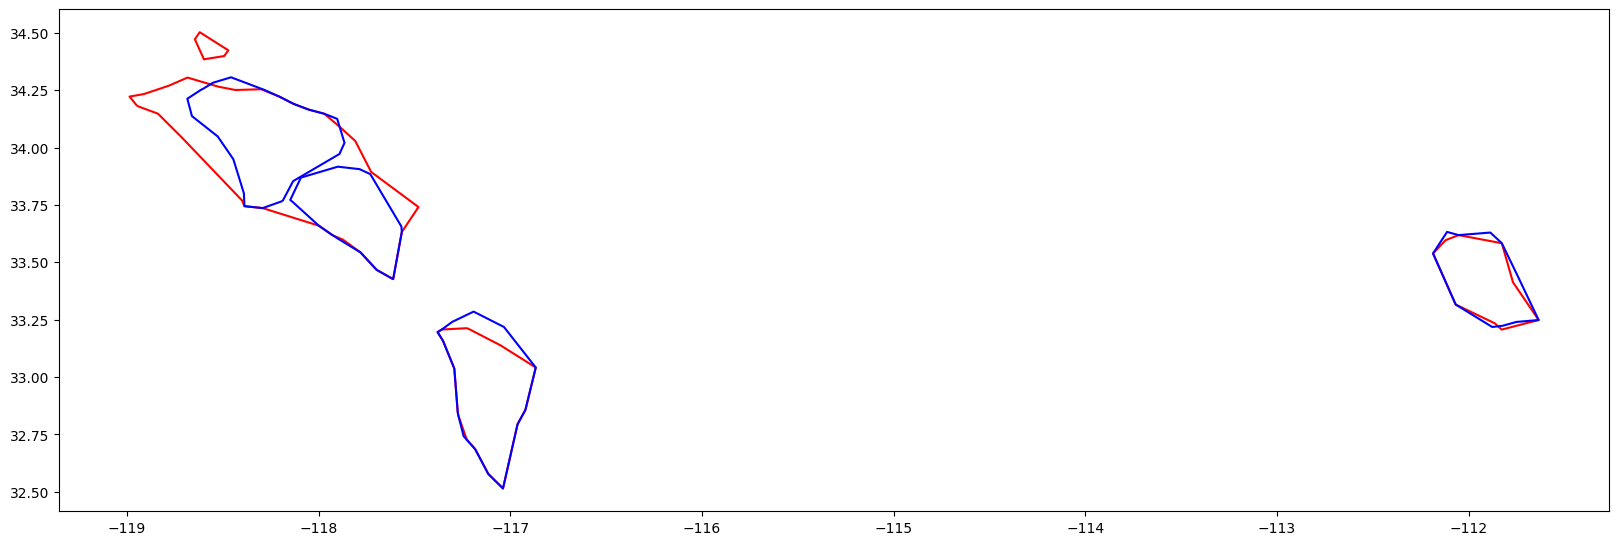

In [78]:
fig, ax = plt.subplots(figsize = (20,16)) 
uber.geometry.boundary.plot(ax=ax, color='red')
curgdf.geometry.boundary.plot(ax=ax, color='blue')
# uber.geometry.boundary.plot(ax=ax, color='purple')

In [53]:
str(geom.values[0])

'POLYGON ((-118.542 34.3917, -118.59852 34.38424, -118.64576 34.47128, -118.62051 34.50222, -118.471 34.4233, -118.49311 34.39833, -118.542 34.3917))'

In [11]:
row.info()

<class 'pandas.core.series.Series'>
Index: 3 entries, cluster to geometry
Series name: 22
Non-Null Count  Dtype 
--------------  ----- 
3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes


In [12]:
uber.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4 entries, 15 to 22
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   cluster   4 non-null      int64   
 1   polygon   4 non-null      bool    
 2   geometry  4 non-null      geometry
dtypes: bool(1), geometry(1), int64(1)
memory usage: 272.0 bytes
